In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Set the path to the CSV file
file_path = r'C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\Resources\Crime_Data_from_2020_to_Present.csv'

# Read the CSV file into a DataFrame
crime_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
crime_data.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [16]:
# Check for missing values in the DataFrame
missing_values = crime_data.isnull().sum()

# Display the count of missing values for each column
missing_values[missing_values > 0]


Mocodes           117642
Vict Sex          111909
Vict Descent      111917
Premis Cd             11
Premis Desc          516
Weapon Used Cd    552364
Weapon Desc       552364
Crm Cd 1              11
Crm Cd 2          785497
Crm Cd 3          845623
Crm Cd 4          847663
Cross Street      712652
dtype: int64

In [18]:
# Drop columns with a large number of missing values
columns_to_drop = ['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
crime_data = crime_data.drop(columns=columns_to_drop)

# Impute missing values for specific columns
columns_to_impute = ['Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc']
for column in columns_to_impute:
    if crime_data[column].dtype == 'O':
        # For categorical columns, fill with the mode
        crime_data[column].fillna(crime_data[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the median
        crime_data[column].fillna(crime_data[column].median(), inplace=True)

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]


Mocodes     117642
Crm Cd 1        11
dtype: int64

In [19]:
# Impute missing values for 'Mocodes' and 'Crm Cd 1'
crime_data['Mocodes'].fillna('', inplace=True)  # Assuming Mocodes is a text column, fill with an empty string
crime_data['Crm Cd 1'].fillna(crime_data['Crm Cd 1'].mode()[0], inplace=True)  # Fill with the mode for 'Crm Cd 1'

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]


Series([], dtype: int64)

In [20]:
# Overview of crime counts by area
crime_counts_by_area = crime_data['AREA NAME'].value_counts()

# Display the top 10 areas with the highest crime counts
top_areas = crime_counts_by_area.head(10)
print("Top 10 Areas with the Highest Crime Counts:")
print(top_areas)

# Overview of crime counts by crime type
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()

# Display the top 10 crime types with the highest counts
top_crime_types = crime_counts_by_type.head(10)
print("\nTop 10 Crime Types with the Highest Counts:")
print(top_crime_types)


Top 10 Areas with the Highest Crime Counts:
AREA NAME
Central        57280
77th Street    53324
Pacific        49502
Southwest      47581
Hollywood      44790
Southeast      43127
Olympic        42732
Newton         42533
N Hollywood    42191
Wilshire       40375
Name: count, dtype: int64

Top 10 Crime Types with the Highest Counts:
Crm Cd Desc
VEHICLE - STOLEN                                           90982
BATTERY - SIMPLE ASSAULT                                   67652
THEFT OF IDENTITY                                          53137
BURGLARY FROM VEHICLE                                      52181
BURGLARY                                                   51663
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48691
THEFT PLAIN - PETTY ($950 & UNDER)                         42999
INTIMATE PARTNER - SIMPLE ASSAULT                          42576
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32691
Nam

In [ ]:
##What is the crime distribution by area?

In [ ]:
#the total crime counts for each area.

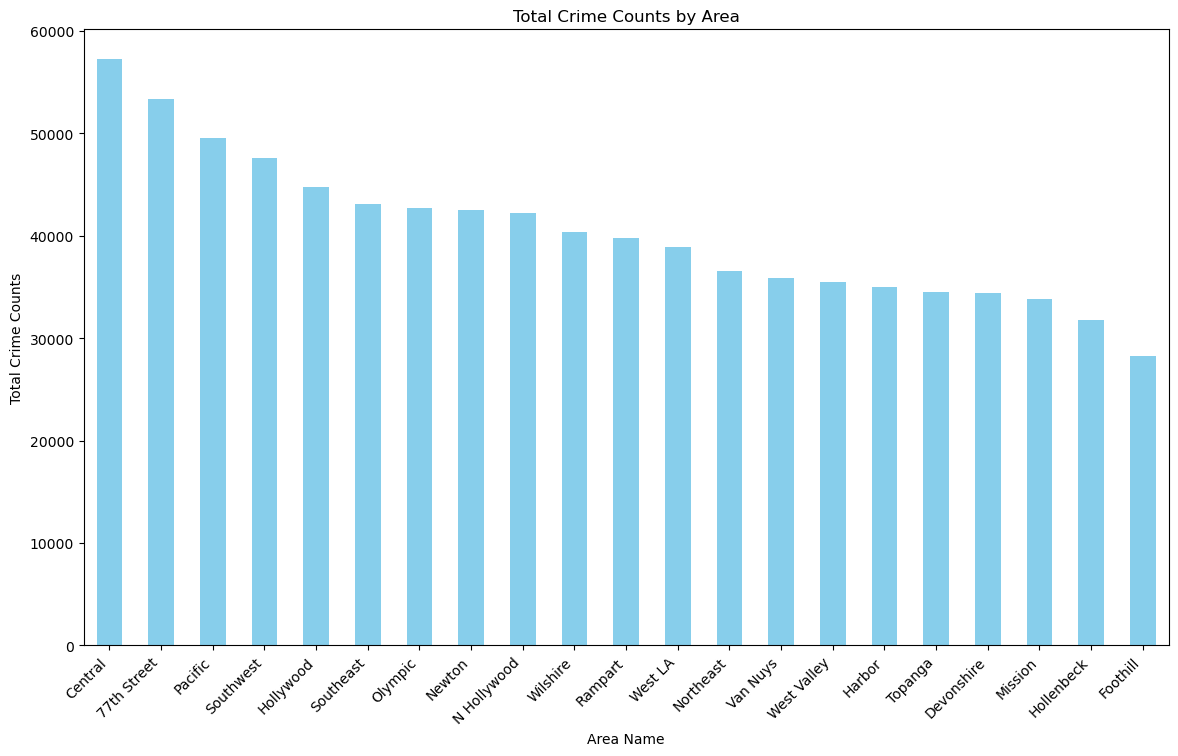

In [21]:
# Bar plot showing the total crime counts for each area using matplotlib
plt.figure(figsize=(14, 8))
crime_data['AREA NAME'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Crime Counts by Area')
plt.xlabel('Area Name')
plt.ylabel('Total Crime Counts')
plt.xticks(rotation=45, ha='right')
plt.show()


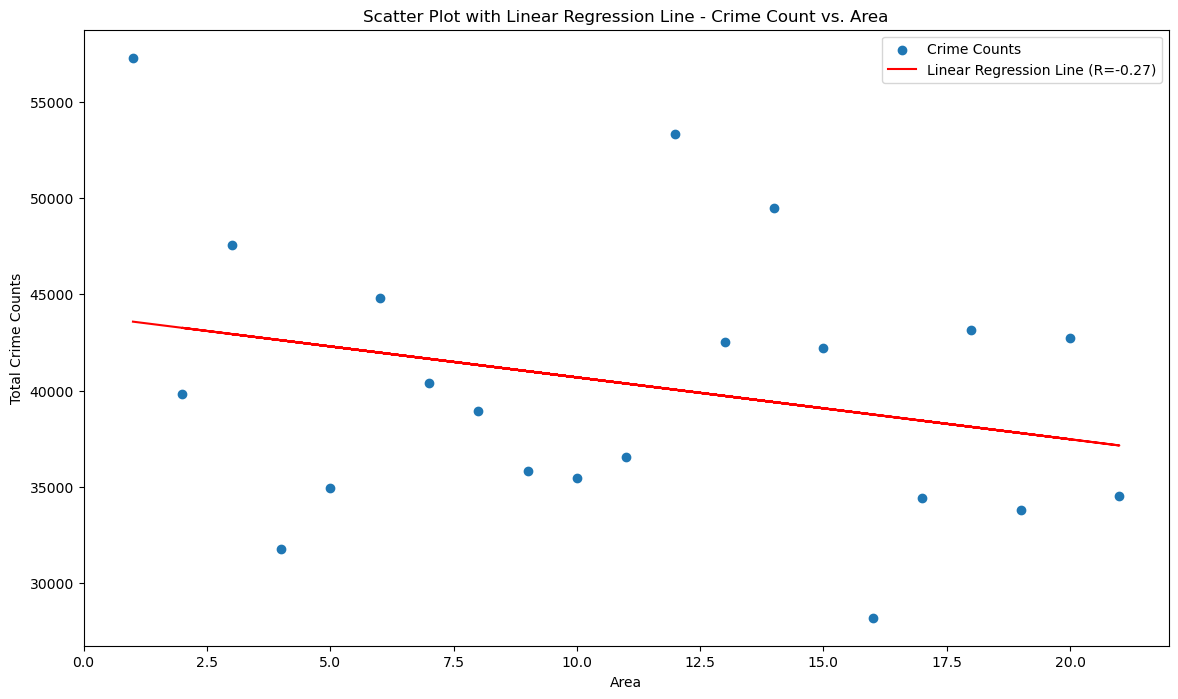

In [29]:
# Scatter plot with a linear regression line using Matplotlib
plt.figure(figsize=(14, 8))
crime_counts_by_area = crime_data['AREA'].value_counts()

# Scatter plot
plt.scatter(crime_counts_by_area.index, crime_counts_by_area.values, label='Crime Counts')

# Calculate linear regression line
slope, intercept, r_value, p_value, std_err = linregress(crime_counts_by_area.index, crime_counts_by_area.values)
line = slope * crime_counts_by_area.index + intercept

# Plot linear regression line with R-value
plt.plot(crime_counts_by_area.index, line, color='red', label=f'Linear Regression Line (R={r_value:.2f})')

plt.title('Scatter Plot with Linear Regression Line - Crime Count vs. Area')
plt.xlabel('Area')
plt.ylabel('Total Crime Counts')
plt.legend()
plt.show()


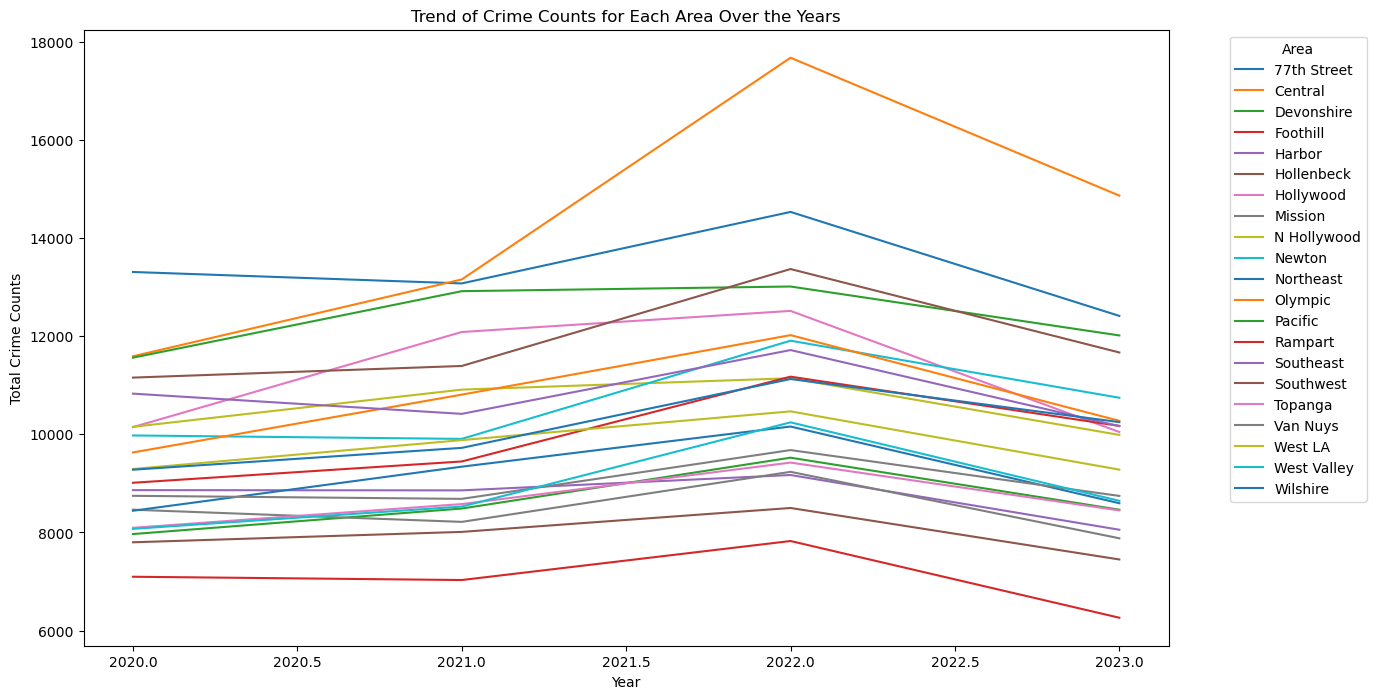

In [25]:
# Convert 'DATE OCC' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract the year from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year

# Line plot showing the trend of crime counts for each area over the years
plt.figure(figsize=(14, 8))

# Group by 'Year' and 'AREA NAME' and calculate total crime counts
crime_counts_by_area_year = crime_data.groupby(['Year', 'AREA NAME'])['DR_NO'].count().reset_index()

# Iterate over unique areas and plot individual lines
for area in crime_counts_by_area_year['AREA NAME'].unique():
    area_data = crime_counts_by_area_year[crime_counts_by_area_year['AREA NAME'] == area]
    plt.plot(area_data['Year'], area_data['DR_NO'], label=area)

plt.title('Trend of Crime Counts for Each Area Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crime Counts')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


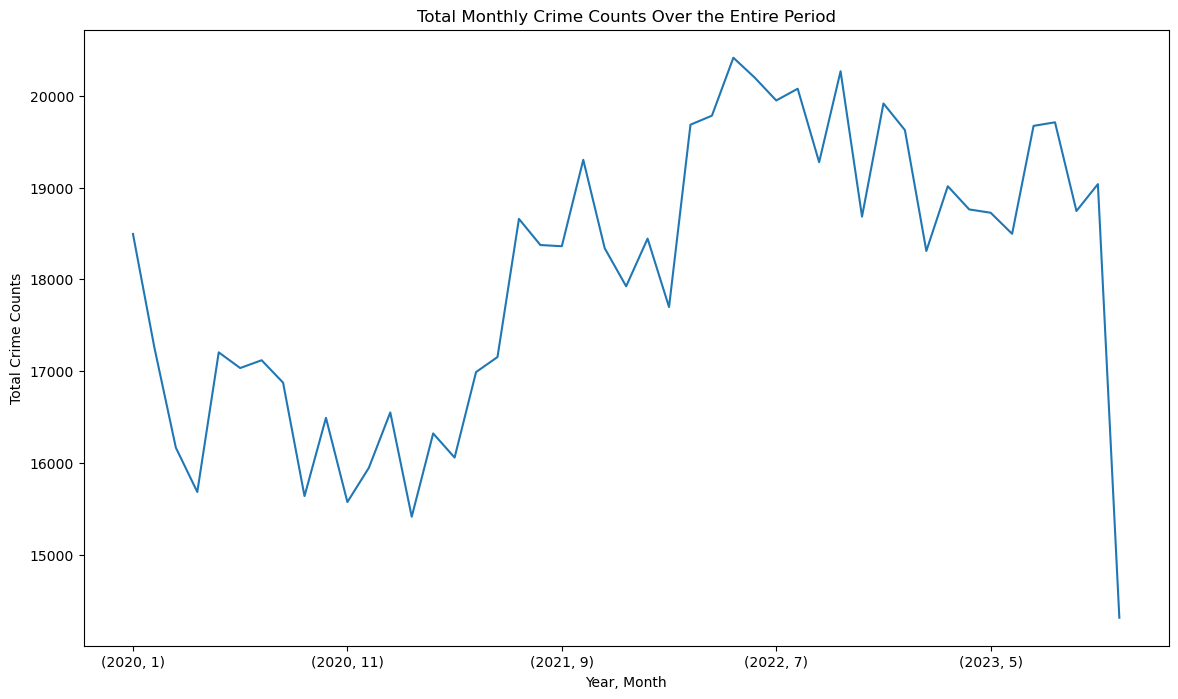

In [27]:
# Convert 'DATE OCC' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract the year and month from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Line plot showing the trend of crime counts for each area over the years
plt.figure(figsize=(14, 8))
crime_data.groupby(['Year', 'Month']).size().plot(legend=False)
plt.title('Total Monthly Crime Counts Over the Entire Period')
plt.xlabel('Year, Month')
plt.ylabel('Total Crime Counts')
plt.show()


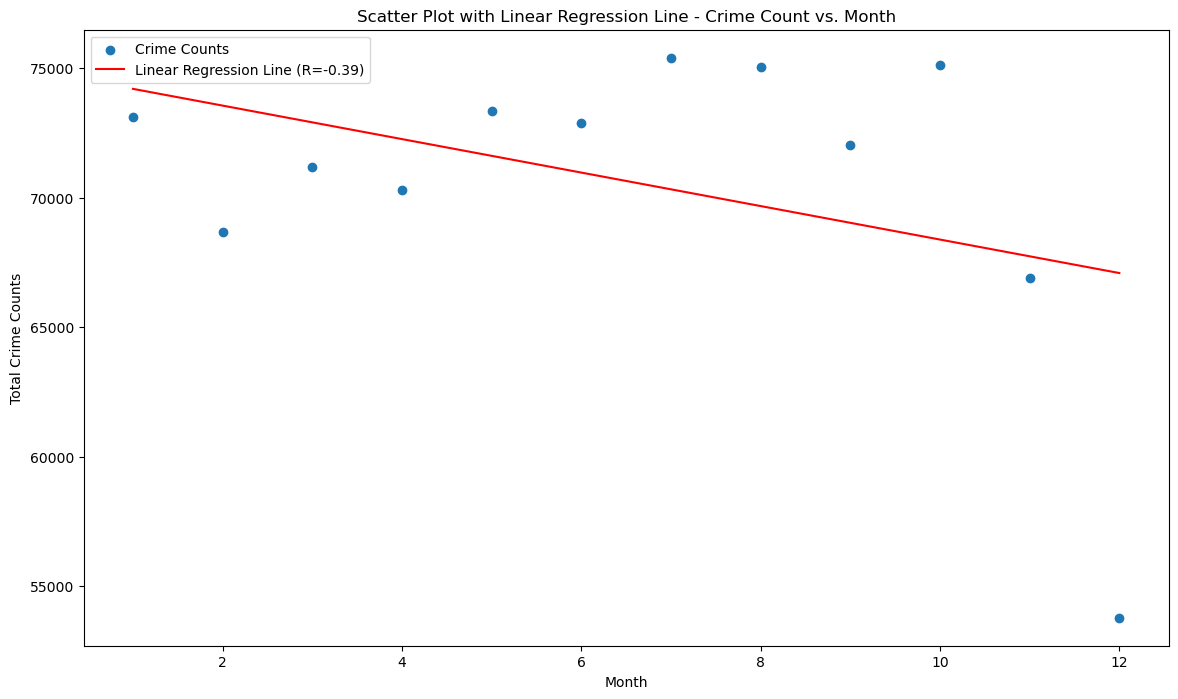

In [30]:
# Convert 'DATE OCC' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract the month from the 'DATE OCC' column
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Scatter plot with a linear regression line
plt.figure(figsize=(14, 8))
plt.scatter(crime_data.groupby('Month').size().index, crime_data.groupby('Month').size().values, label='Crime Counts')

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(crime_data.groupby('Month').size().index, crime_data.groupby('Month').size().values)
plt.plot(crime_data.groupby('Month').size().index, slope * crime_data.groupby('Month').size().index + intercept, color='red', label=f'Linear Regression Line (R={r_value:.2f})')

plt.title('Scatter Plot with Linear Regression Line - Crime Count vs. Month')
plt.xlabel('Month')
plt.ylabel('Total Crime Counts')
plt.legend()
plt.show()
